In [1]:
import pandas as pd

# Carregando o arquivo CadastroFuncionarios.csv
# Correção de virgulas no arquivo com sep e decimal
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

In [2]:
# Colunas sem uso
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### Folha Salarial

In [3]:
salarios = funcionarios_df['Salario Base'].sum()
impostos = funcionarios_df['Impostos'].sum()
beneficios = funcionarios_df['Beneficios'].sum()
vt = funcionarios_df['VT'].sum()
vr = funcionarios_df['VR'].sum()
total = salarios + impostos + beneficios + vt + vr

print(f"""
==========================================
  Salários base: R$ {salarios:,.2f}
  Impostos: R$ {impostos:,.2f}
  Benefícios: R$ {beneficios:,.2f}
  Vale transporto: R$ {vt:,.2f}
  Vale refeição: R$ {vr:,.2f}
------------------------------------------
  Total de gastos: R$ {total:,.2f}
==========================================
""")


  Salários base: R$ 1,537,849.00
  Impostos: R$ 768,924.50
  Benefícios: R$ 307,569.80
  Vale transporto: R$ 26,972.00
  Vale refeição: R$ 76,177.92
------------------------------------------
  Total de gastos: R$ 2,717,493.22



### Faturamento da Empresa

In [4]:
# Criando DataFrame baseado em duas tabelas
faturamento_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']])
# Coluna com total faturamento 
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
display(faturamento_df)

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal,Faturamento Total
0,1,14,540,7560
1,2,12,1260,15120
2,4,14,2520,35280
3,5,8,3510,28080
4,6,8,2340,18720
...,...,...,...,...
232,315,4,1575,6300
233,316,8,3690,29520
234,317,6,2385,14310
235,319,14,4185,58590


In [5]:
faturamento = faturamento_df['Faturamento Total'].sum()
print(f"""
=====================================
    Faturamento R$ {faturamento:,.2f}
=====================================
      """)


    Faturamento R$ 5,519,160.00
      


### % funcionários que fecharam contrato

In [6]:
funcionarios_servicos_unicos = pd.unique(servicos_df['ID Funcionário'])
funcionarios_fecharam = len(funcionarios_servicos_unicos)
quantidade_funcionarios = len(funcionarios_df['ID Funcionário'])

print(f"""
=============================
  {funcionarios_fecharam/quantidade_funcionarios:,.1%} fecharam serviços.
=============================""")


  86.8% fecharam serviços.


### Quantidade de contratos por Área

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro



 Contratos fechados por área
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64 


<AxesSubplot:>

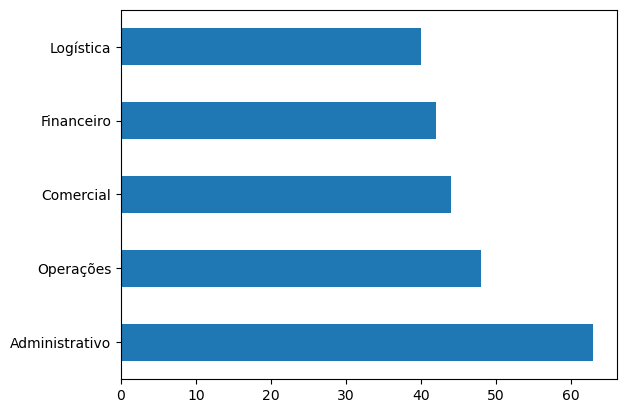

In [7]:
# Criando DataFrame de contratos
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on='ID Funcionário')
display(contratos_area_df)

contratos_area = contratos_area_df['Area'].value_counts()
print(f"""
=============================
 Contratos fechados por área
=============================
{contratos_area} 
=============================""")
contratos_area.plot(kind='barh')

### Funcionários por Área

,ID Funcionário,Area
0,1,Operações
1,2,Logística
2,3,Administrativo
3,4,Administrativo
4,5,Administrativo
...,...,...
109,143,Logística
110,144,Comercial
111,148,Administrativo
112,149,Comercial



 Funcionários por setor
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64 



<AxesSubplot:ylabel='Area'>

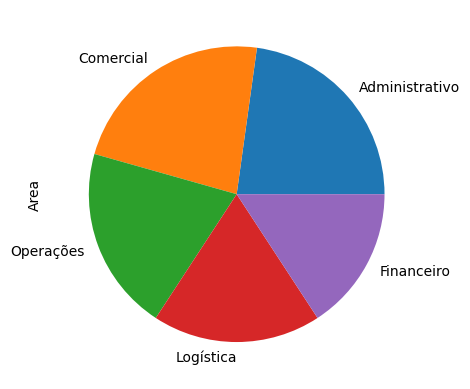

In [8]:
funcionarios_area_df = funcionarios_df[['ID Funcionário','Area']]
display(funcionarios_area_df)

funcionarios_area = funcionarios_area_df['Area'].value_counts()
print(f"""
=============================
 Funcionários por setor
=============================
{funcionarios_area} 
=============================
""")


funcionarios_area.plot(kind='pie')

In [9]:
ticket = clientes_df['Valor Contrato Mensal'].mean()
print(f"""
=====================================
    Faturamento R$ {ticket:,.2f}
=====================================
      """)


    Faturamento R$ 2,502.56
      
